In [1]:
import xgboost
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [25]:
PATH_FEATURES = "/home/lauraflyra/Documents/BCCN/Lab_Rotation_USC/Code/Data/py_neuromodulation_derivatives/sub-000_ses-right_task-force_run-3/sub-000_ses-right_task-force_run-3_FEATURES.csv"
data_features = pd.read_csv(PATH_FEATURES, index_col=0)

In [26]:
data_features

,LFP_RIGHT_0-LFP_RIGHT_2_RawHjorth_Activity,LFP_RIGHT_0-LFP_RIGHT_2_RawHjorth_Mobility,LFP_RIGHT_0-LFP_RIGHT_2_RawHjorth_Complexity,LFP_RIGHT_1-LFP_RIGHT_0_RawHjorth_Activity,LFP_RIGHT_1-LFP_RIGHT_0_RawHjorth_Mobility,LFP_RIGHT_1-LFP_RIGHT_0_RawHjorth_Complexity,LFP_RIGHT_2-LFP_RIGHT_1_RawHjorth_Activity,LFP_RIGHT_2-LFP_RIGHT_1_RawHjorth_Mobility,LFP_RIGHT_2-LFP_RIGHT_1_RawHjorth_Complexity,ECOG_RIGHT_0-avgref_RawHjorth_Activity,...,ECOG_RIGHT_5-avgref_bursts_high beta_in_burst,ECOG_RIGHT_5-avgref_bursts_low gamma_duration_mean,ECOG_RIGHT_5-avgref_bursts_low gamma_amplitude_mean,ECOG_RIGHT_5-avgref_bursts_low gamma_duration_max,ECOG_RIGHT_5-avgref_bursts_low gamma_amplitude_max,ECOG_RIGHT_5-avgref_bursts_low gamma_burst_rate_per_s,ECOG_RIGHT_5-avgref_bursts_low gamma_in_burst,time,MOV_RIGHT_CLEAN,MOV_LEFT_CLEAN
0,1562.615572,0.130055,9.268180,1309.885585,0.161999,7.813250,954.972812,0.158440,7.528980,3015.187531,...,0.000000,0.004429,1.681545,0.006000,4.148742,0.004429,1.000000,1000.0,0.0,0.0
1,1.000000,-1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1100.0,0.0,0.0
2,0.722490,-0.963441,0.707420,1.097330,-1.147176,0.986447,1.139308,-1.031659,1.060395,-1.412070,...,0.000000,0.707107,0.417278,0.707107,-0.385417,0.707107,-0.707107,1200.0,0.0,0.0
3,-1.610054,1.684523,-1.586443,1.381400,-1.305790,1.328473,0.977279,-0.878815,0.947714,-0.738663,...,0.000000,-0.862840,0.526619,-1.000000,-0.531428,-0.862840,-0.577350,1300.0,0.0,0.0
4,-1.877130,1.914834,-1.880712,1.514749,-1.454390,1.518623,0.145981,-0.244134,0.117332,-0.774873,...,2.000000,1.394678,0.658157,0.816497,-0.163798,1.394678,-0.500000,1400.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,-0.158334,-0.003338,-0.107208,-1.086961,0.740096,-0.681858,-0.788650,0.907880,-0.705945,-0.537812,...,-0.489560,0.000765,0.356495,1.076406,-0.128568,0.000765,-0.633932,281500.0,0.0,0.0
2806,-0.356929,0.054849,-0.195871,-1.002834,0.597824,-0.583769,-1.378797,3.000000,-2.002600,-0.468113,...,-0.484322,0.291067,0.811597,1.076406,2.115705,0.291067,-0.628768,281600.0,0.0,0.0
2807,-0.143435,-0.037973,-0.080982,-0.885967,0.517632,-0.540723,-1.301237,2.935267,-1.812327,-0.277103,...,2.042649,-0.188227,-0.078007,-0.898635,-0.459153,-0.188227,1.577457,281700.0,0.0,0.0
2808,0.248654,-0.232042,0.200648,-0.583047,0.156641,-0.098141,-1.261675,2.729181,-1.743705,0.058211,...,-0.489560,-0.246340,0.126521,1.083648,0.292656,-0.246340,-0.633932,281800.0,0.0,0.0


In [27]:
data_features.keys()

Index(['LFP_RIGHT_0-LFP_RIGHT_2_RawHjorth_Activity',
       'LFP_RIGHT_0-LFP_RIGHT_2_RawHjorth_Mobility',
       'LFP_RIGHT_0-LFP_RIGHT_2_RawHjorth_Complexity',
       'LFP_RIGHT_1-LFP_RIGHT_0_RawHjorth_Activity',
       'LFP_RIGHT_1-LFP_RIGHT_0_RawHjorth_Mobility',
       'LFP_RIGHT_1-LFP_RIGHT_0_RawHjorth_Complexity',
       'LFP_RIGHT_2-LFP_RIGHT_1_RawHjorth_Activity',
       'LFP_RIGHT_2-LFP_RIGHT_1_RawHjorth_Mobility',
       'LFP_RIGHT_2-LFP_RIGHT_1_RawHjorth_Complexity',
       'ECOG_RIGHT_0-avgref_RawHjorth_Activity',
       ...
       'ECOG_RIGHT_5-avgref_bursts_high beta_in_burst',
       'ECOG_RIGHT_5-avgref_bursts_low gamma_duration_mean',
       'ECOG_RIGHT_5-avgref_bursts_low gamma_amplitude_mean',
       'ECOG_RIGHT_5-avgref_bursts_low gamma_duration_max',
       'ECOG_RIGHT_5-avgref_bursts_low gamma_amplitude_max',
       'ECOG_RIGHT_5-avgref_bursts_low gamma_burst_rate_per_s',
       'ECOG_RIGHT_5-avgref_bursts_low gamma_in_burst', 'time',
       'MOV_RIGHT_CLEAN', 'MO

In [28]:
shuffled_df =data_features.sample(frac=1)

# Ordered dataset

In [29]:
feature_df = pd.concat([data_features.filter(like='STN'),data_features.filter(like='ECOG')], axis = 1).filter(like='bandpass_activity').to_numpy()
behavior_df = data_features["MOV_LEFT_CLEAN"].to_numpy().reshape(-1, 1)

In [30]:
train_idx_features = np.arange(np.round(0.5 * data_features.shape[0]), dtype=int)
test_idx_features = np.arange(1 + train_idx_features[-1], data_features.shape[0])

feat_train = feature_df[train_idx_features]
feat_test = feature_df[test_idx_features]

mov_features_train = behavior_df[train_idx_features]
mov_features_test = behavior_df[test_idx_features]

In [31]:
model = xgboost.XGBRegressor()
model.fit(feat_train, mov_features_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [32]:
mov_feat_test_pred = model.predict(feat_test)

In [33]:
print(model)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)


In [34]:
r2 = r2_score(mov_features_test, mov_feat_test_pred)
print("R2: {}".format(r2))

R2: 0.6600606511063383


In [35]:
R = np.corrcoef(mov_features_test, mov_feat_test_pred, rowvar=False)

In [36]:
R[0,1]

0.8156097042432318

In [37]:
cv_score = cross_val_score(model, X = feature_df, y=behavior_df, scoring='r2', cv = 5, n_jobs=-1 )

In [38]:
print(np.mean(cv_score), np.std(cv_score))

0.6517765346236696 0.03832398477198442


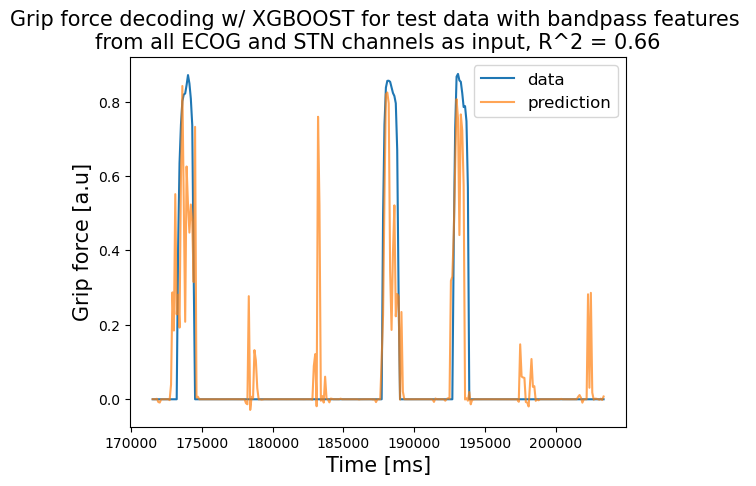

In [43]:
time_array = data_features['time'].to_numpy().reshape(-1, 1)[test_idx_features]
plt.plot(time_array[300:620], mov_features_test.reshape(-1,)[300:620], label = 'data')
plt.plot(time_array[300:620], mov_feat_test_pred.reshape(-1,)[300:620], label = 'prediction', alpha = 0.7)
plt.title("Grip force decoding w/ XGBOOST for test data with bandpass features \nfrom all ECOG and STN channels as input, R^2 = {:.3g}".format(np.mean(r2)), fontsize = 15)
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Grip force [a.u]", fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

# Shuffled data set

In [5]:
feature_df_shuffled = pd.concat([shuffled_df.filter(like='STN'),shuffled_df.filter(like='ECOG')], axis = 1).filter(like='bandpass_activity').to_numpy()
behavior_df_shuffled = shuffled_df["MOV_LEFT_CLEAN"].to_numpy().reshape(-1, 1)

In [6]:
train_idx_features = np.arange(np.round(0.5 * shuffled_df.shape[0]), dtype=int)
test_idx_features = np.arange(1 + train_idx_features[-1], shuffled_df.shape[0])

feat_train_shuffled = feature_df_shuffled[train_idx_features]
feat_test_shuffled = feature_df_shuffled[test_idx_features]

mov_features_train_shuffled = behavior_df_shuffled[train_idx_features]
mov_features_test_shuffled = behavior_df_shuffled[test_idx_features]

In [7]:
model_shuffled = xgboost.XGBRegressor()
model_shuffled.fit(feat_train_shuffled, mov_features_train_shuffled)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [8]:
mov_feat_test_pred_shuffled = model_shuffled.predict(feat_test_shuffled)

In [9]:
print(model_shuffled)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)


In [10]:
r2_shuffled = r2_score(mov_features_test_shuffled, mov_feat_test_pred_shuffled)
print("R2: {}".format(r2_shuffled))

R2: 0.645623047690533


In [11]:
R_shuffled = np.corrcoef(mov_features_test_shuffled, mov_feat_test_pred_shuffled, rowvar=False)

In [12]:
R_shuffled[0,1]

0.8036222343072589

In [13]:
cv_score_shuffled = cross_val_score(model_shuffled, X = feature_df_shuffled, y=behavior_df_shuffled, scoring='r2', cv = 5, n_jobs=-1 )

In [14]:
print(np.mean(cv_score_shuffled), np.std(cv_score_shuffled))

0.6883274220751596 0.049937617616187195


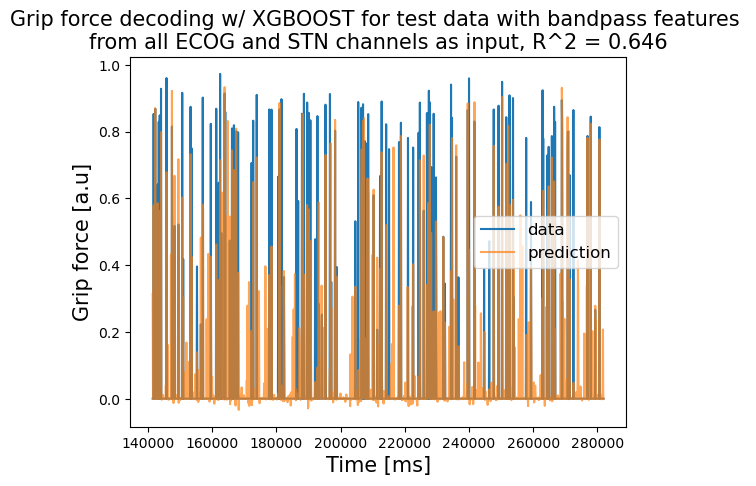

In [15]:
time_array = data_features['time'].to_numpy().reshape(-1, 1)[test_idx_features]
plt.plot(time_array, mov_features_test_shuffled.reshape(-1,), label = 'data')
plt.plot(time_array, mov_feat_test_pred_shuffled.reshape(-1,), label = 'prediction', alpha = 0.7)
plt.title("Grip force decoding w/ XGBOOST for shuffled test data with bandpass features \nfrom all ECOG and STN channels as input, R^2 = {:.3g}".format(np.mean(r2_shuffled)), fontsize = 15)
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Grip force [a.u]", fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

## Try fft features

In [14]:
feature_df = pd.concat([data_features.filter(like='STN'),data_features.filter(like='ECOG')], axis = 1).filter(like='fft').to_numpy()
behavior_df = data_features["MOV_LEFT_CLEAN"].to_numpy().reshape(-1, 1)

In [15]:
train_idx_features = np.arange(np.round(0.5 * data_features.shape[0]), dtype=int)
test_idx_features = np.arange(1 + train_idx_features[-1], data_features.shape[0])

feat_train = feature_df[train_idx_features]
feat_test = feature_df[test_idx_features]

mov_features_train = behavior_df[train_idx_features]
mov_features_test = behavior_df[test_idx_features]

In [16]:
model = xgboost.XGBRegressor()
model.fit(feat_train, mov_features_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [17]:
mov_feat_test_pred = model.predict(feat_test)

In [18]:
print(model)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)


In [19]:
r2 = r2_score(mov_features_test, mov_feat_test_pred, multioutput='raw_values')
print("R2: {}".format(r2))

R2: [0.2354009]


In [20]:
R = np.corrcoef(mov_features_test, mov_feat_test_pred, rowvar=False)

In [21]:
R[0,1]

0.581659154945348

In [22]:
cv_score = cross_val_score(model, X = feature_df, y=behavior_df, scoring='r2', cv = 5, n_jobs=-1 )

In [23]:
print(np.mean(cv_score), np.std(cv_score))

0.3057697181648574 0.2112866746389942


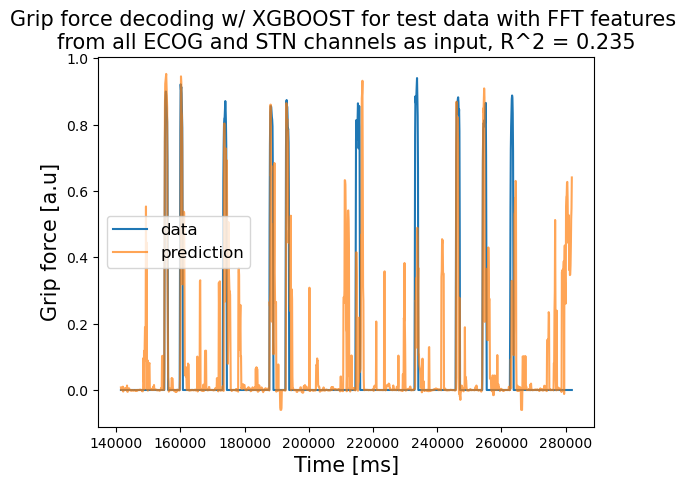

In [24]:
time_array = data_features['time'].to_numpy().reshape(-1, 1)[test_idx_features]
plt.plot(time_array, mov_features_test.reshape(-1,), label = 'data')
plt.plot(time_array, mov_feat_test_pred.reshape(-1,), label = 'prediction', alpha = 0.7)
plt.title("Grip force decoding w/ XGBOOST for test data with FFT features \nfrom all ECOG and STN channels as input, R^2 = {:.3g}".format(np.mean(r2)), fontsize = 15)
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Grip force [a.u]", fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

## Try Hjorth features

In [25]:
feature_df = pd.concat([data_features.filter(like='STN'),data_features.filter(like='ECOG')], axis = 1).filter(like='Hjorth').to_numpy()
behavior_df = data_features["MOV_LEFT_CLEAN"].to_numpy().reshape(-1, 1)

In [26]:
train_idx_features = np.arange(np.round(0.5 * data_features.shape[0]), dtype=int)
test_idx_features = np.arange(1 + train_idx_features[-1], data_features.shape[0])

feat_train = feature_df[train_idx_features]
feat_test = feature_df[test_idx_features]

mov_features_train = behavior_df[train_idx_features]
mov_features_test = behavior_df[test_idx_features]

In [27]:
model = xgboost.XGBRegressor()
model.fit(feat_train, mov_features_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [28]:
mov_feat_test_pred = model.predict(feat_test)

In [29]:
print(model)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)


In [30]:
r2 = r2_score(mov_features_test, mov_feat_test_pred, multioutput='raw_values')
print("R2: {}".format(r2))

R2: [0.5079101]


In [31]:
R = np.corrcoef(mov_features_test, mov_feat_test_pred, rowvar=False)

In [32]:
R[0,1]

0.7616005694007103

In [33]:
cv_score = cross_val_score(model, X = feature_df, y=behavior_df, scoring='r2', cv = 5, n_jobs=-1 )

In [34]:
print(np.mean(cv_score), np.std(cv_score))

0.661707319730636 0.0763051765042889


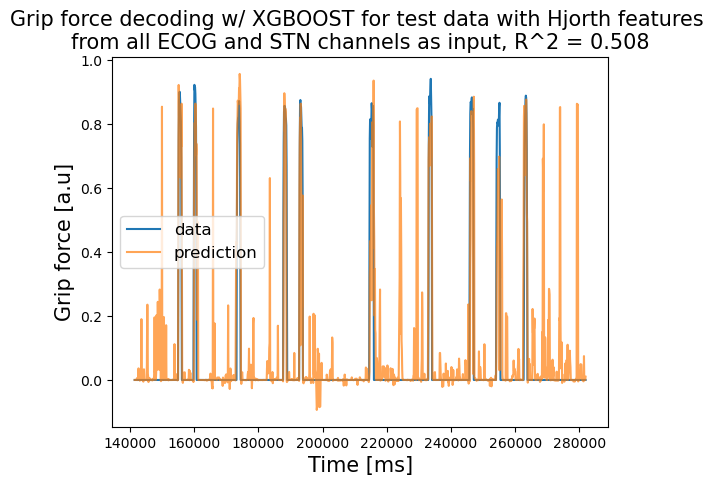

In [35]:
time_array = data_features['time'].to_numpy().reshape(-1, 1)[test_idx_features]
plt.plot(time_array, mov_features_test.reshape(-1,), label = 'data')
plt.plot(time_array, mov_feat_test_pred.reshape(-1,), label = 'prediction', alpha = 0.7)
plt.title("Grip force decoding w/ XGBOOST for test data with Hjorth features \nfrom all ECOG and STN channels as input, R^2 = {:.3g}".format(np.mean(r2)), fontsize = 15)
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Grip force [a.u]", fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

# sub-003

In [2]:
PATH_FEATURES_S3 = "/home/lauraflyra/Documents/BCCN/Lab_Rotation_USC/Code/Data/py_neuromodulation_derivatives/sub-003_ses-right_task-force_run-4/sub-003_ses-right_task-force_run-4_FEATURES.csv"
data_features_s3 = pd.read_csv(PATH_FEATURES_S3, index_col=0)

In [3]:
feature_df_s3 = data_features_s3.filter(like='ECOG_RIGHT').filter(like='bandpass_activity').to_numpy()
behavior_s3 = data_features_s3["MOV_LEFT_CLEAN"].to_numpy().reshape(-1, 1)

In [5]:
model_s3 = xgboost.XGBRegressor()

In [6]:
train_idx_features_s3 = np.arange(np.round(0.5 * data_features_s3.shape[0]), dtype=int)
test_idx_features_s3 = np.arange(1 + train_idx_features_s3[-1], data_features_s3.shape[0])

feat_train_s3 = feature_df_s3[train_idx_features_s3]
feat_test_s3 = feature_df_s3[test_idx_features_s3]

mov_features_train_s3 = behavior_s3[train_idx_features_s3]
mov_features_test_s3 = behavior_s3[test_idx_features_s3]

In [7]:
model_s3.fit(feat_train_s3, mov_features_train_s3)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [8]:
mov_feat_test_pred_s3 = model_s3.predict(feat_test_s3)

In [9]:
print(model_s3)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)


In [10]:
r2_s3 = r2_score(mov_features_test_s3, mov_feat_test_pred_s3)
print("R2: {}".format(r2_s3))

R2: -0.20848143778469996


In [11]:
R_s3 = np.corrcoef(mov_features_test_s3, mov_feat_test_pred_s3, rowvar=False)

In [12]:
R_s3[0,1]

0.40477668898248964

In [13]:
cv_score_s3 = cross_val_score(model_s3, X = feature_df_s3, y=behavior_s3, scoring='r2', cv = 5, n_jobs=-1 )

In [14]:
print(np.mean(cv_score_s3), np.std(cv_score_s3))

0.03450157226606108 0.15268143368256543


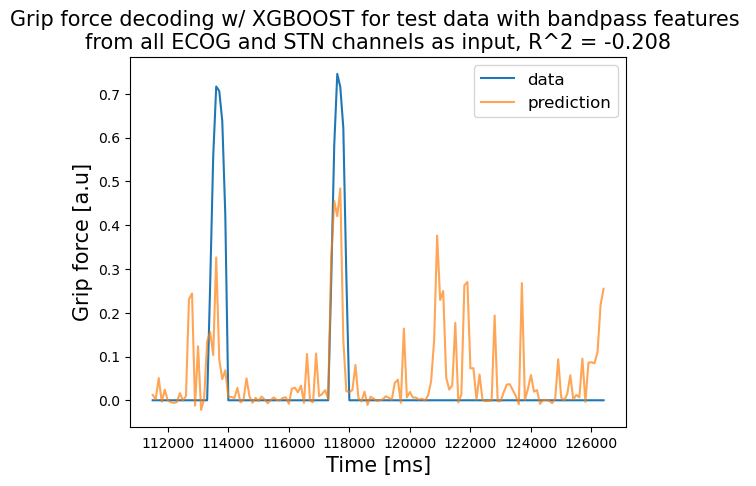

In [24]:
time_array_s3 = data_features_s3['time'].to_numpy().reshape(-1, 1)[test_idx_features_s3]
plt.plot(time_array_s3[270:420], mov_features_test_s3.reshape(-1,)[270:420], label = 'data')
plt.plot(time_array_s3[270:420], mov_feat_test_pred_s3.reshape(-1,)[270:420], label = 'prediction', alpha = 0.7)
plt.title("Grip force decoding w/ XGBOOST for test data with bandpass features \nfrom all ECOG and STN channels as input, R^2 = {:.3g}".format(np.mean(r2_s3)), fontsize = 15)
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Grip force [a.u]", fontsize = 15)
plt.legend(fontsize = 12)
plt.show()